Usando o arquivo:  ..\datas\arquivos_consolidados\consolidado_20250423_114539.csv


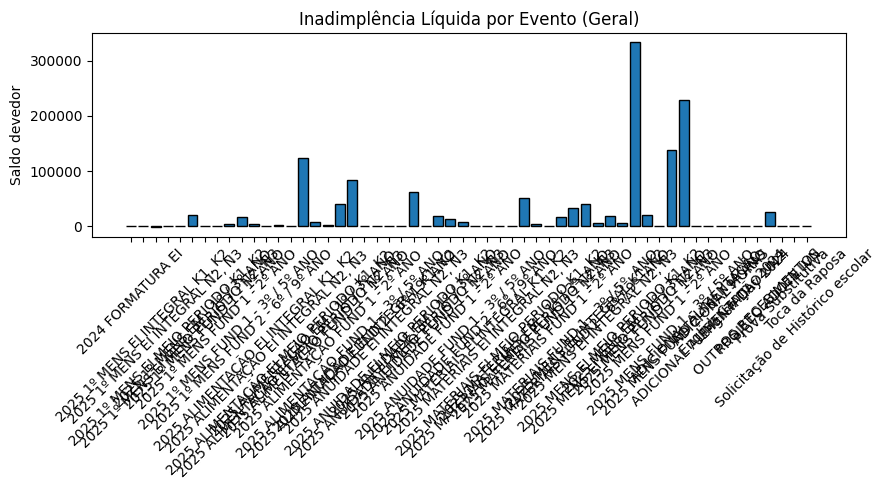

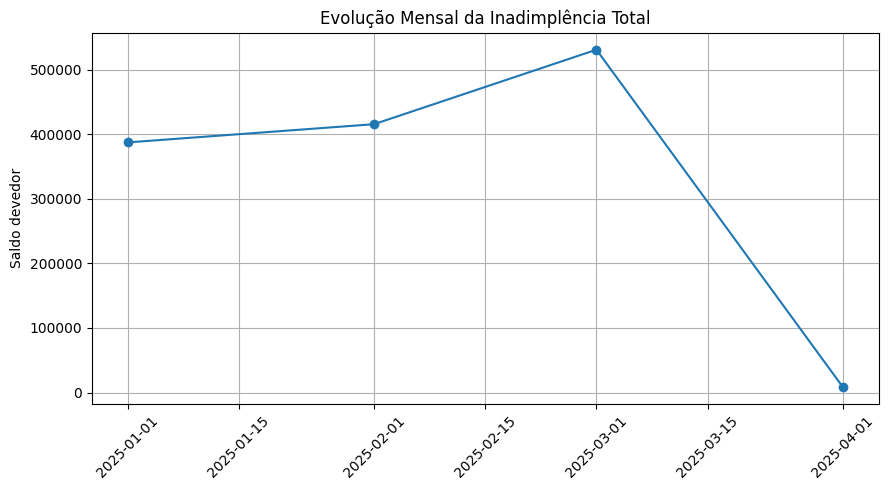

C:\Users\user\AppData\Local\Temp\ipykernel_3120\2952160698.py:84: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.xticks(rotation=45); plt.grid(); plt.tight_layout(); plt.show()


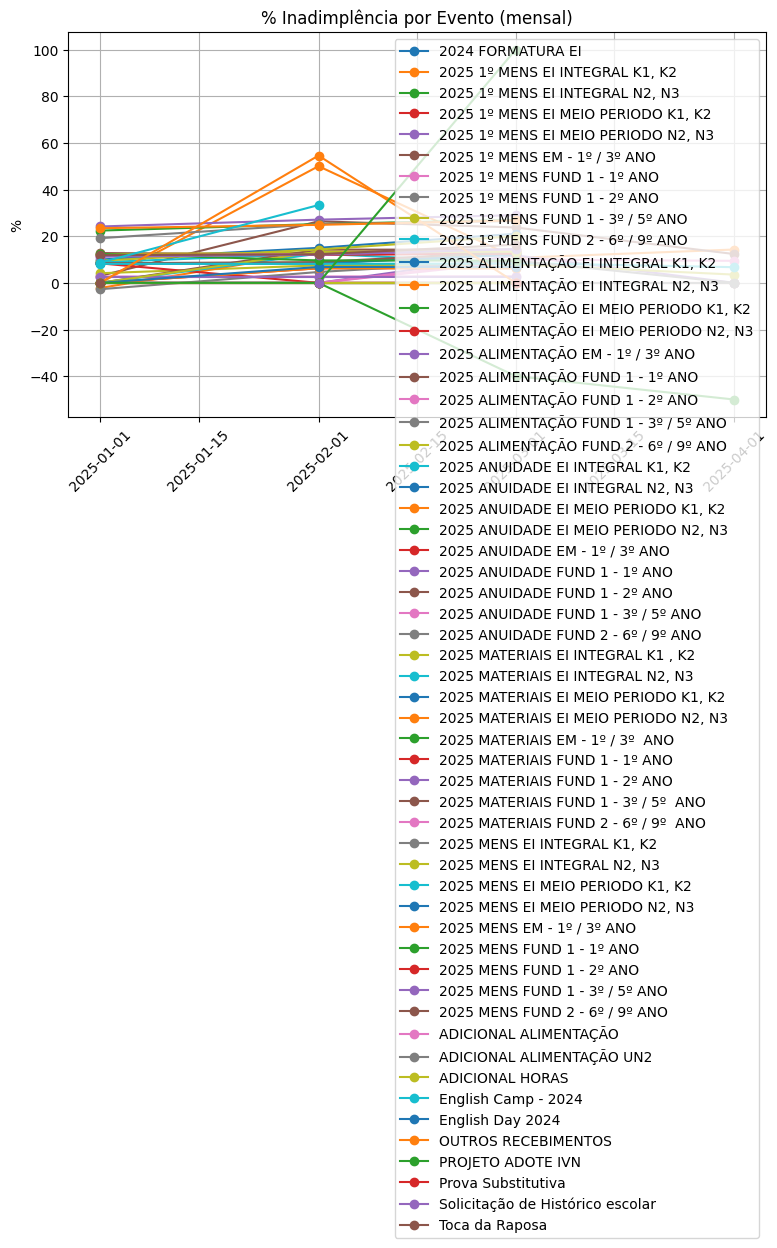

In [ ]:
import pandas as pd
from pathlib import Path
#Localizar consolidado mais recente

BASE_DIR = Path("../datas")
CONSOLIDADOS_DIR = BASE_DIR / "arquivos_consolidados"

#seleciona o arquivo csv mais atual
arquivo = sorted(CONSOLIDADOS_DIR.glob("consolidado_*csv"),key=lambda p:p.stat().st_mtime, reverse= True)[0]

df = pd.read_csv(arquivo,sep=';',encoding="utf-8")

#Renomeia e converte as colunas monetarias

def to_float(x):
    try: return float(str(x).replace("$","").replace(".","").replace(",","."))
    except: return 0.0

for c in ["valor_liquido","valor_pagamento","saldo_devedor"]:
    df[c] = df[c].apply(to_float)


#Criando uma competência AAAA-MM-01

df["competencia"] = pd.to_datetime(df["fatura-ano"].astype(int).astype(str)+"-"+df["fatura-mes"].astype(int).astype(str).str.zfill(2)+"-1")






